In [144]:
import pandas as pd
import numpy as np
import pickle as p

data_all = pd.read_csv('../data_all.csv')

# Test with Subset of Data
np.random.seed(43)
item_subset = list(np.random.choice(data_all['Item_ID'].unique(), size=6, replace=False))
store_subset = list(np.random.choice(data_all['Store'].unique(), size=6, replace=False))
data_subset = data_all.loc[data_all['Item_ID'].isin(item_subset)].copy()
data_subset = data_subset.loc[data_all['Store'].isin(store_subset)].copy()

In [145]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [146]:
data_subset

,Wk,Tier,Groups,Store,Item_ID,Qty_,Price_
420444,26,23,80,1447,16019,78.0,13.75
420445,25,23,80,1447,16019,113.0,13.75
420446,24,23,80,1447,16019,123.0,13.75
420447,23,23,80,1447,16019,171.0,13.70
420448,22,23,80,1447,16019,159.0,13.65
...,...,...,...,...,...,...,...
2627738,5,26,28,467,202,1436.0,2.25
2627739,4,26,28,467,202,1393.0,2.25
2627740,3,26,28,467,202,1755.0,2.25
2627741,2,26,28,467,202,2188.0,2.25


In [147]:
data_subset_agg = data_subset.groupby(['Wk', 'Item_ID']).agg(
    sum_Qty=('Qty_', 'sum'),
    mean_Price=('Price_', 'mean'))
data_subset_agg.reset_index(inplace=True)

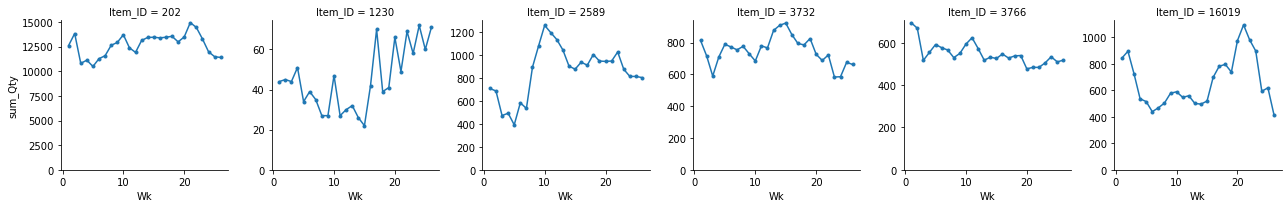

In [148]:
g = sns.FacetGrid(data_subset_agg, col="Item_ID",  col_wrap=6, sharex=True, sharey=False)
g = g.map(plt.plot, "Wk","sum_Qty", marker='.')
g.set(ylim=(0, None))


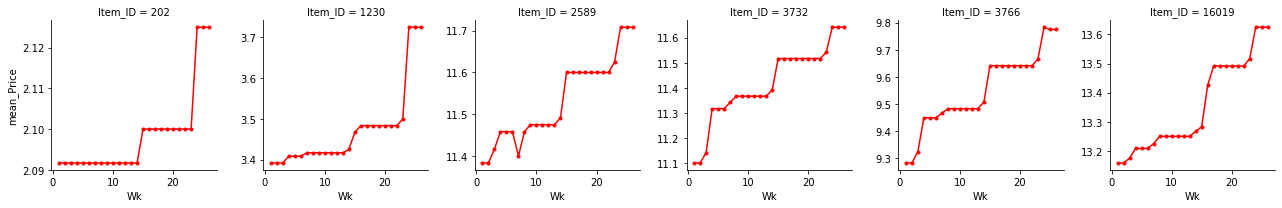

In [149]:
g = sns.FacetGrid(data_subset_agg, col="Item_ID",  col_wrap=6, sharex=True, sharey=False)
g = g.map(plt.plot, "Wk","mean_Price", marker='.', color='r')
# g.set(ylim=(0, None))

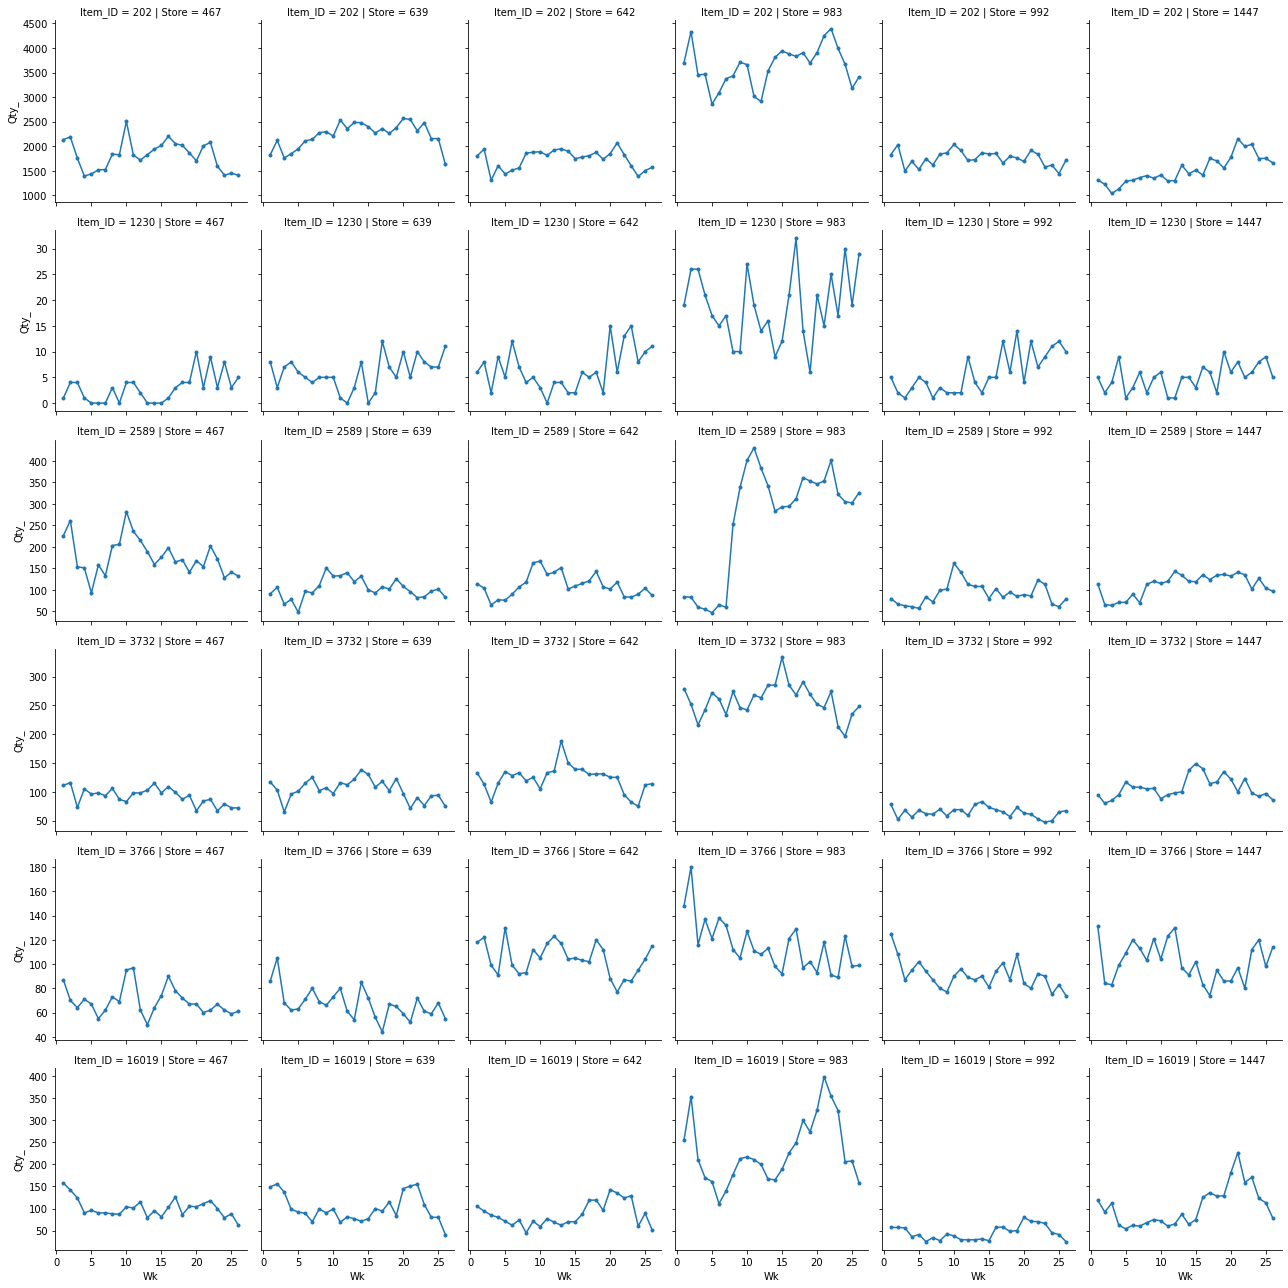

In [150]:
g = sns.FacetGrid(data_subset, col="Store",  row="Item_ID", sharex=True, sharey='row')
g = g.map(plt.plot, "Wk","Qty_", marker='.')


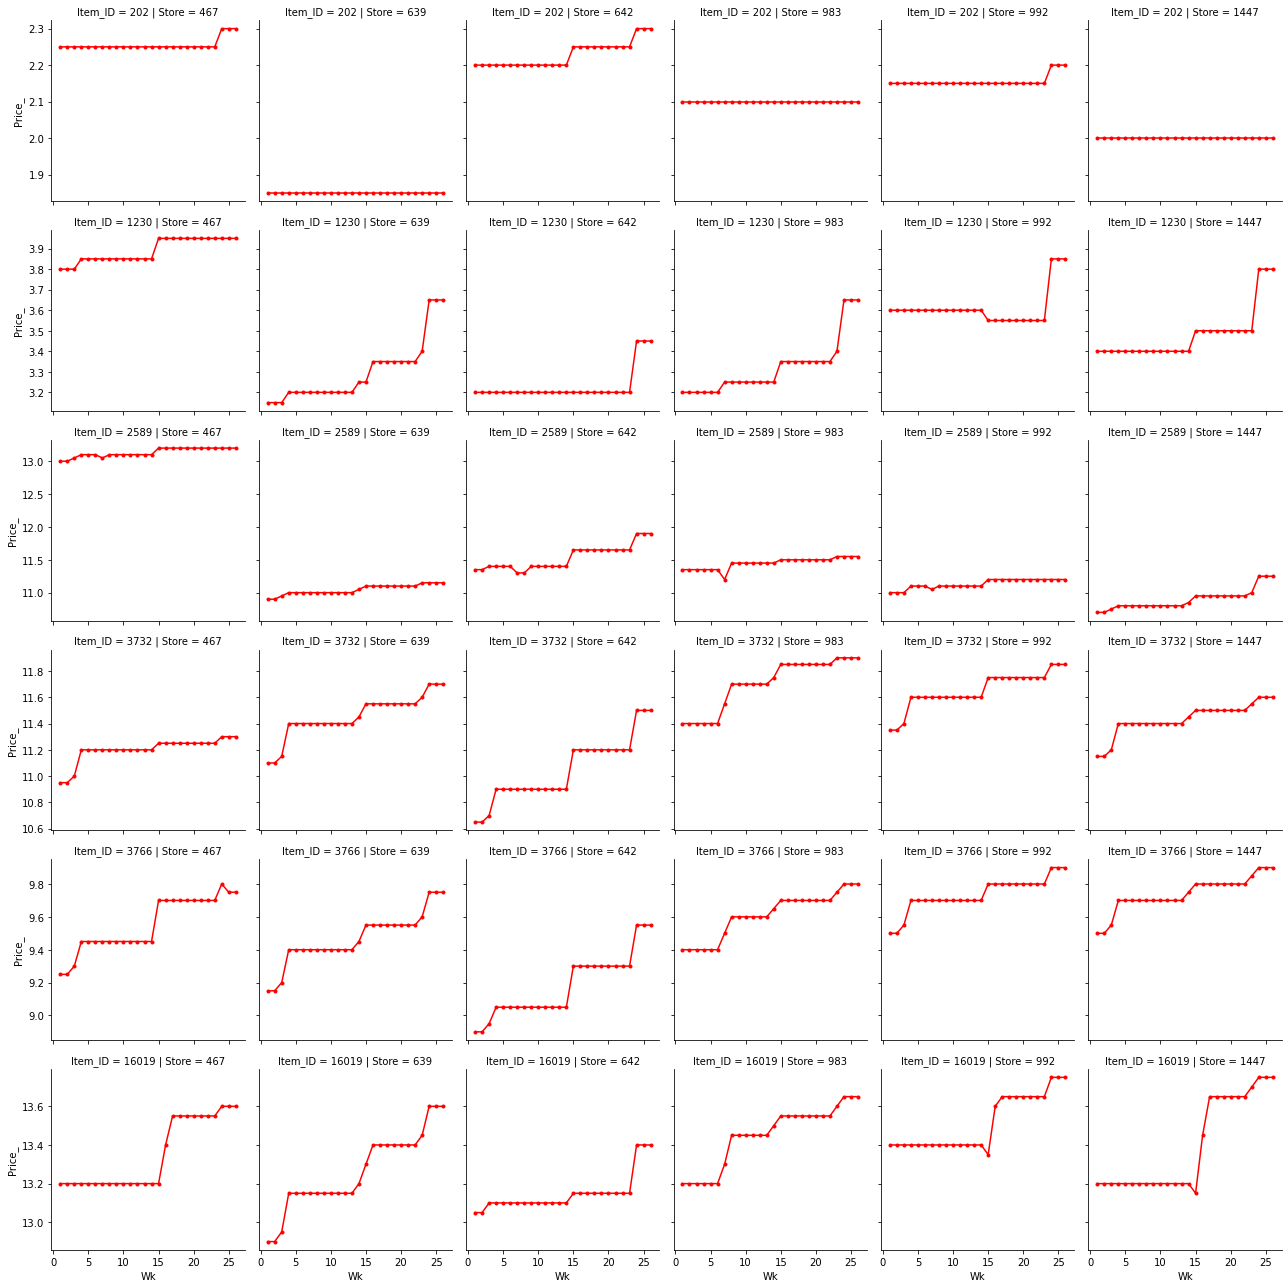

In [151]:
g = sns.FacetGrid(data_subset, col="Store",  row="Item_ID", sharex=True, sharey='row')
g = g.map(plt.plot, "Wk","Price_", marker='.', color='r')
